In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [326]:
bills_df= pd.read_csv("bills.csv")
bills_df

,kWh,Date
0,59375.2,06/06/2020
1,59451.2,25/06/2020
2,59814.6,15/08/2020
3,59881.0,06/09/2020
4,60083.6,28/09/2020
5,60272.5,11/10/2020
6,60346.2,15/10/2020


In [327]:
date_lst=[]

for date in bills_df.Date:

    date=datetime.strptime(date, "%d/%m/%Y")
    date_lst.append(date)
bills_df["DateTime"]=date_lst

bills_df

,kWh,Date,DateTime
0,59375.2,06/06/2020,2020-06-06
1,59451.2,25/06/2020,2020-06-25
2,59814.6,15/08/2020,2020-08-15
3,59881.0,06/09/2020,2020-09-06
4,60083.6,28/09/2020,2020-09-28
5,60272.5,11/10/2020,2020-10-11
6,60346.2,15/10/2020,2020-10-15


In [328]:
xticks=bills_df["DateTime"]-bills_df["DateTime"][0]
x_ticks=[]
for xtick in xticks: 
    x_ticks.append(xtick.days)


In [329]:
days_lst=[0]
m=0
n=0
for days in bills_df["DateTime"]:
    
        m+=1
        
        if m<bills_df.shape[0]:
            
            delta=bills_df["DateTime"][m]-bills_df["DateTime"][n]
            n+=1
            days_lst.append(delta.days)
        else:
            break
            


In [330]:

diff= bills_df["kWh"].values[1:]-bills_df["kWh"].values[:-1]

diff=np.append([0],diff)



In [331]:
cost=diff*0.1875

cons= diff/days_lst
cons[0]=0

time_span= bills_df["DateTime"][bills_df.shape[0]-1]-bills_df["DateTime"][0]
time_span.days

<ipython-input-331-5b8e0e5d3a52>:3: RuntimeWarning: invalid value encountered in true_divide
  cons= diff/days_lst


131

In [332]:
a=(time_span.days+1)
a=np.zeros(a)


In [333]:
n=0
for x in x_ticks:
    
    a[x]= diff[n]
    n+=1

average price for the UK is 18.75 p/kWh

In [334]:
daily_avg=[]
b=[]
m=0
for days in list(df.days.values):
    b=[]
    b.append(list(df.consumption.values)[m])
    daily_avg+= b*days
    m+=1
    


In [335]:
d={"January":[0],"february":[0],"March":[0],"April":[0],"May":[0],"June":[0],"July":[0],"August":[0],"September":[0],"October":[0],"November":[0],"December":[0],}
monthly=pd.DataFrame(d)


In [336]:

for m in range(0,13):
    for row in range(df.shape[0]):
        
        date_obj=datetime.strptime(df.iloc[row].date, "%d/%m/%Y")
        if date_obj.month-1 ==m: 
            #print(df.iloc[row].increase)
            
            monthly[monthly.columns[m]]= monthly[monthly.columns[m]] + df.iloc[row].increase



In [337]:
"""plt.title("Kwh increase from previous reading (in kWh)")

plt.bar(range(len(diff)),diff)
plt.xticks(range(len(diff)),bills_df.Date, rotation=20)
plt.show()"""

'plt.title("Kwh increase from previous reading (in kWh)")\n\nplt.bar(range(len(diff)),diff)\nplt.xticks(range(len(diff)),bills_df.Date, rotation=20)\nplt.show()'

In [338]:
"""plt.title("increase from previous reading vs days")

plt.bar(range(time_span.days+1),a)
plt.xticks(x_ticks,bills_df.Date, rotation=20)

plt.show()"""

'plt.title("increase from previous reading vs days")\n\nplt.bar(range(time_span.days+1),a)\nplt.xticks(x_ticks,bills_df.Date, rotation=20)\n\nplt.show()'

In [339]:

"""plt.title("daily average in Kwh")

plt.plot(range(len(daily_avg)),daily_avg)
plt.xticks(x_ticks,bills_df.Date, rotation=20)
plt.show()

"""

'plt.title("daily average in Kwh")\n\nplt.plot(range(len(daily_avg)),daily_avg)\nplt.xticks(x_ticks,bills_df.Date, rotation=20)\nplt.show()\n\n'

In [340]:
"""

monthly_cost=monthly/18.75
monthly_cost.plot(table=True, kind="bar", title="Monthly cost in GBP")

"""

'\n\nmonthly_cost=monthly/18.75\nmonthly_cost.plot(table=True, kind="bar", title="Monthly cost in GBP")\n\n'

In [341]:
"""df= pd.DataFrame({"total kWh":bills_df["kWh"],"increase":diff,"cost": cost, "date":bills_df.Date,"days":days_lst,"consumption":cons})
print("-an average price for the UK is 18.75 p/kWh has been used")
print("-total days: {}".format(time_span.days))
df"""

'df= pd.DataFrame({"total kWh":bills_df["kWh"],"increase":diff,"cost": cost, "date":bills_df.Date,"days":days_lst,"consumption":cons})\nprint("-an average price for the UK is 18.75 p/kWh has been used")\nprint("-total days: {}".format(time_span.days))\ndf'

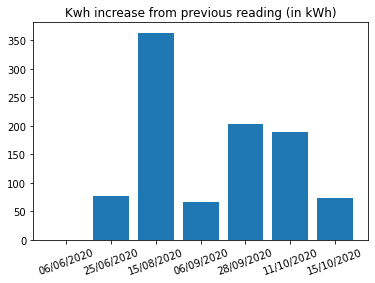

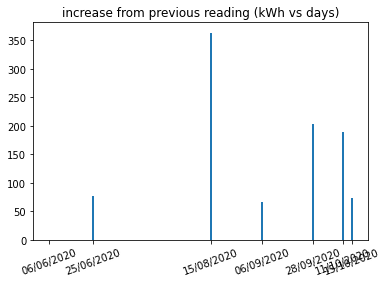

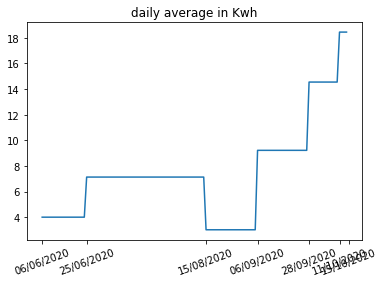

-an average price for the UK is 18.75 p/kWh has been used
-total days: 131


,total kWh,increase,cost,date,days,consumption
0,59375.2,0.0,0.00000,06/06/2020,0,0.000000
1,59451.2,76.0,14.25000,25/06/2020,19,4.000000
2,59814.6,363.4,68.13750,15/08/2020,51,7.125490
3,59881.0,66.4,12.45000,06/09/2020,22,3.018182
4,60083.6,202.6,37.98750,28/09/2020,22,9.209091
5,60272.5,188.9,35.41875,11/10/2020,13,14.530769
6,60346.2,73.7,13.81875,15/10/2020,4,18.425000


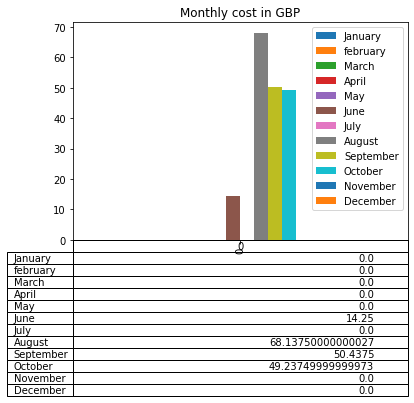

In [346]:
plt.title("Kwh increase from previous reading (in kWh)")

plt.bar(range(len(diff)),diff)
plt.xticks(range(len(diff)),bills_df.Date, rotation=20)
plt.show()

plt.title("increase from previous reading (kWh vs days)")

plt.bar(range(time_span.days+1),a)
plt.xticks(x_ticks,bills_df.Date, rotation=20)

plt.show()

plt.title("daily average in Kwh")

plt.plot(range(len(daily_avg)),daily_avg)
plt.xticks(x_ticks,bills_df.Date, rotation=20)
plt.show()

monthly_cost=monthly*0.1875
monthly_cost.plot(table=True, kind="bar", title="Monthly cost in GBP")

df= pd.DataFrame({"total kWh":bills_df["kWh"],"increase":diff,"cost": cost, "date":bills_df.Date,"days":days_lst,"consumption":cons})
print("-an average price for the UK is 18.75 p/kWh has been used")
print("-total days: {}".format(time_span.days))
df